In [170]:
import pandas as pd
import requests
import sys
import numpy as np
import ast

In [171]:
tfs = pd.read_csv("original_data/lambert_supp_tables.csv")
tfs = tfs[tfs["Is TF?"] == "Yes"][["EnsemblId", "symbol"]]
tfs.to_csv("lambert_tfs.csv")
tfs.head()

,EnsemblId,symbol
1,ENSG00000137203,TFAP2A
2,ENSG00000008196,TFAP2B
3,ENSG00000087510,TFAP2C
4,ENSG00000008197,TFAP2D
5,ENSG00000116819,TFAP2E


In [172]:
ads = pd.read_csv("original_data/known_ADs_considering_isoforms_and_canonical.csv")
ads.head()

,Gene,Start,End,uniprotID,Matching Isoforms,Canonical Transcript ID,orig_uniprotID,Reference,TileType,ProteinRegionSeq,Notes
0,ABRAXAS1,121,200,Q6UWZ7,[['Q6UWZ7']],ENST00000321945,Q6UWZ7,DelRosso et al.,CR,LQEHFSNQDLVFLLLTPSIITESCSTHRLEHSLYKPQKGLFHRVPL...,NaN
1,AEBP1,1088,1158,Q8IUX7,[['Q8IUX7']],NaN,Q8IUX7,Staller Activity Data,TF,EVVTEFGTEVEPEFGTKVEPEFETQLEPEFETQLEPEFEEEEEEEK...,NaN
2,AHCTF1,1445,1698,Q8WYP5,"[['Q8WYP5'], ['Q8WYP5']]",nan / nan,Q8WYP5 / Q8WYP5,"PMID: 11952839, Soto / transcriptionalactivity...",TF,IRANDNKSMADVLGDGGNSSLTISEGPIVSERRLNQEVALNLKEDH...,NaN
3,AHR,118,126,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,LLQALNGFV,NaN
4,AHR,266,268,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,FAI,NaN


In [173]:
rds = pd.read_csv("original_data/tycko_soto_delrosso_RD_coordinate_data.csv")
rds = rds.rename({" DBDs": "DBDs"}, axis=1)
rds["DBDs"] = [ast.literal_eval(x) for x in rds["DBDs"]]
rds.head()

,UniprotId,DBDs
0,A0A024R0Y4,"[(11, 90)]"
1,A0A087X169,"[(21, 140)]"
2,A0A0A0MRP6,"[(11, 140), (561, 650), (881, 960)]"
3,A0A0B4J2G0,"[(2, 81), (352, 431), (612, 731)]"
4,A0A0C4DFL8,"[(581, 700), (831, 910), (931, 1050)]"


---
#Processing AD and RD dfs

In [174]:
len(tfs["EnsemblId"].unique()), len(ads["Gene"].unique()), len(rds["UniprotId"].unique())

(1639, 589, 1695)

---
IGNORE PAST HERE

In [175]:
combined_uniprot = tfs["symbol"].to_list()
combined_uniprot += ads["uniprotID"].to_list()
combined_uniprot += rds["UniprotId"].to_list()
#pd.Series(combined_uniprot).drop_duplicates().to_csv("uniprotnames.csv")

In [225]:
tfsmapped = pd.read_csv("maps/ID Mapping Dec 10 2024.tsv", delimiter="\t")
tfsmapped.head()

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Tissue specificity,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas
0,ENSG00000137203,P05549,reviewed,AP2A_HUMAN,Transcription factor AP-2-alpha (AP2-alpha) (A...,TFAP2A AP2TF TFAP2,Homo sapiens (Human),437,NaN,"MOTIF 57..62; /note=""PPxY motif""",AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,P05549; baseline and differential.;
1,ENSG00000137203,A0A6E1XE14,unreviewed,A0A6E1XE14_HUMAN,Transcription factor AP-2-alpha (AP-2 transcri...,TFAP2A hCG_37170,Homo sapiens (Human),439,NaN,NaN,AP-2 family,"COMPBIAS 25..50; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,NaN
2,ENSG00000137203,C1K3N0,unreviewed,C1K3N0_HUMAN,Transcription factor AP-2-alpha (AP-2 transcri...,TFAP2A,Homo sapiens (Human),328,NaN,NaN,AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,NaN
3,ENSG00000137203,C9J6N8,unreviewed,C9J6N8_HUMAN,Transcription factor AP-2 alpha,TFAP2A,Homo sapiens (Human),173,NaN,NaN,NaN,"COMPBIAS 7..22; /note=""Polar residues""; /evide...",NaN,ENSG00000137203; Expressed in upper leg skin a...,C9J6N8; baseline and differential.;
4,ENSG00000137203,C9JXZ2,unreviewed,C9JXZ2_HUMAN,Transcription factor AP-2 alpha,TFAP2A,Homo sapiens (Human),136,NaN,NaN,AP-2 family,NaN,SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,C9JXZ2; baseline and differential.;


In [227]:
adsmapped = ads.merge(tfsmapped, left_on="uniprotID", right_on="Entry")
rdsmapped = rds.merge(tfsmapped, left_on="UniprotId", right_on="Entry")
lambertf = tfs.merge(tfsmapped, left_on="EnsemblId", right_on="From")

print(len(adsmapped), len(ads))
print(len(rdsmapped), len(rds))
print(len(lambertf), len(tfs))

613 744
1070 1695
6170 1639


In [222]:
len(tfsmapped)

6170

In [177]:
rd_ENSG_dict = rds.merge(tfsmapped, left_on="UniprotId", right_on="Entry")[["From", "Entry"]].set_index("From")["Entry"].to_dict()
ad_ENSG_dict = ads.merge(tfsmapped, left_on="uniprotID", right_on="Entry")[["From", "Entry"]].set_index("From")["Entry"].to_dict()
tfs_ENSG_dict = tfs.set_index("EnsemblId")["symbol"].to_dict()

rd_ENSG = set(rd_ENSG_dict.keys())
ad_ENSG = set(ad_ENSG_dict.keys())
tfs_ENSG = tfs.merge(tfsmapped, left_on="EnsemblId", right_on="From")["From"].unique()
reviewed_ENSG = set(tfsmapped[tfsmapped["Reviewed"] == "reviewed"]["From"].to_list())

combined_ENSG_list = set(list(rd_ENSG) + list(ad_ENSG) + list(tfs_ENSG))
unreviewed_ENSG = [item for item in combined_list if item not in reviewed_ENSG]

len(unreviewed_ENSG), len(reviewed_ENSG), len(set(combined_list))

(14, 1615, 1629)

In [221]:
#adsmapped.to_csv("ADS_mapped.csv")
#rdsmapped.to_csv("RDs_mapped.csv")

,UniprotId,DBDs,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Tissue specificity,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas
0,A0A087X169,"[(21, 140)]",ENSG00000119403,A0A087X169,unreviewed,A0A087X169_HUMAN,PHD finger protein 19,PHF19,Homo sapiens (Human),599,NaN,NaN,Polycomblike family,NaN,SIMILARITY: Belongs to the Polycomblike family...,ENSG00000119403; Expressed in ventricular zone...,A0A087X169; baseline and differential.;
1,A0A0B4J2G0,"[(2, 81), (352, 431), (612, 731)]",ENSG00000196247,A0A0B4J2G0,unreviewed,A0A0B4J2G0_HUMAN,Zinc finger protein 107,ZNF107,Homo sapiens (Human),852,NaN,NaN,NaN,NaN,NaN,ENSG00000196247; Expressed in secondary oocyte...,A0A0B4J2G0; baseline and differential.;
2,A0A0C4DFQ2,"[(102, 181), (192, 311), (362, 441)]",ENSG00000177125,A0A0C4DFQ2,unreviewed,A0A0C4DFQ2_HUMAN,Zinc finger and BTB domain containing 34,ZBTB34,Homo sapiens (Human),504,NaN,NaN,NaN,"COMPBIAS 170..193; /note=""Polar residues""; /ev...",NaN,ENSG00000177125; Expressed in amniotic fluid a...,A0A0C4DFQ2; baseline and differential.;
3,A0A0C4DH12,"[(32, 111), (142, 261)]",ENSG00000102984,A0A0C4DH12,unreviewed,A0A0C4DH12_HUMAN,Zinc finger protein 821,ZNF821,Homo sapiens (Human),370,NaN,NaN,NaN,"COMPBIAS 25..41; /note=""Basic and acidic resid...",NaN,ENSG00000102984; Expressed in cortical plate a...,NaN
4,A0A0D9SEJ8,"[(2, 101)]",ENSG00000275004,A0A0D9SEJ8,unreviewed,A0A0D9SEJ8_HUMAN,Suppressor of hairy wing homolog 2 (Drosophila...,ZNF280B SUHW2 hCG_1783609,Homo sapiens (Human),543,NaN,NaN,NaN,"COMPBIAS 8..23; /note=""Basic and acidic residu...",NaN,ENSG00000275004; Expressed in male germ line s...,A0A0D9SEJ8; baseline and differential.;


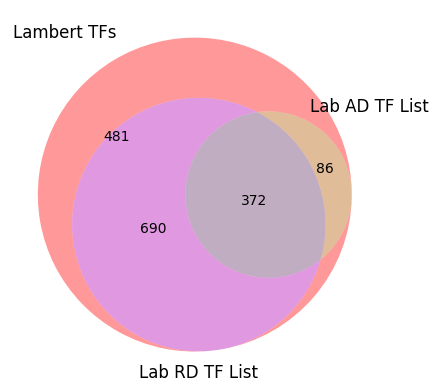

In [178]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

venn3(subsets = (set(tfs_ENSG), set(ad_ENSG), set(rd_ENSG)),set_labels = ('Lambert TFs', 'Lab AD TF List', 'Lab RD TF List'))

plt.savefig("TFcountsvenn.png")

In [179]:
rd_unreviewed = [rd_ENSG_dict[i] for i in unreviewed_ENSG if i in rd_ENSG_dict.keys()]
ad_unreviewed = [ad_ENSG_dict[i] for i in unreviewed_ENSG  if i in ad_ENSG_dict.keys()]
tf_unreviewed = [tfs_ENSG_dict[i] for i in unreviewed_ENSG  if i in tfs_ENSG_dict.keys()]
all_unreviewed = list(set(rd_unreviewed + ad_unreviewed + tf_unreviewed))

unreviewed_df = tfsmapped[[item in unreviewed_ENSG for item in tfsmapped["From"]]]
unreviewed_df = unreviewed_df[[item in all_unreviewed for item in unreviewed_df["Entry"]]]

In [217]:
tfsmapped[[i in combined_list for i in tfsmapped["From"]]]

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Tissue specificity,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas
0,ENSG00000137203,P05549,reviewed,AP2A_HUMAN,Transcription factor AP-2-alpha (AP2-alpha) (A...,TFAP2A AP2TF TFAP2,Homo sapiens (Human),437,NaN,"MOTIF 57..62; /note=""PPxY motif""",AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,P05549; baseline and differential.;
1,ENSG00000137203,A0A6E1XE14,unreviewed,A0A6E1XE14_HUMAN,Transcription factor AP-2-alpha (AP-2 transcri...,TFAP2A hCG_37170,Homo sapiens (Human),439,NaN,NaN,AP-2 family,"COMPBIAS 25..50; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,NaN
2,ENSG00000137203,C1K3N0,unreviewed,C1K3N0_HUMAN,Transcription factor AP-2-alpha (AP-2 transcri...,TFAP2A,Homo sapiens (Human),328,NaN,NaN,AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,NaN
3,ENSG00000137203,C9J6N8,unreviewed,C9J6N8_HUMAN,Transcription factor AP-2 alpha,TFAP2A,Homo sapiens (Human),173,NaN,NaN,NaN,"COMPBIAS 7..22; /note=""Polar residues""; /evide...",NaN,ENSG00000137203; Expressed in upper leg skin a...,C9J6N8; baseline and differential.;
4,ENSG00000137203,C9JXZ2,unreviewed,C9JXZ2_HUMAN,Transcription factor AP-2 alpha,TFAP2A,Homo sapiens (Human),136,NaN,NaN,AP-2 family,NaN,SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,C9JXZ2; baseline and differential.;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,ENSG00000168152,D6R957,unreviewed,D6R957_HUMAN,THAP domain containing 9,THAP9,Homo sapiens (Human),30,NaN,NaN,NaN,NaN,NaN,ENSG00000168152; Expressed in sperm and 130 ot...,D6R957; baseline and differential.;
6166,ENSG00000168152,D6RCT5,unreviewed,D6RCT5_HUMAN,THAP domain containing 9,THAP9,Homo sapiens (Human),102,NaN,NaN,NaN,NaN,NaN,ENSG00000168152; Expressed in sperm and 130 ot...,D6RCT5; baseline and differential.;
6167,ENSG00000168152,D6REM3,unreviewed,D6REM3_HUMAN,THAP domain containing 9,THAP9,Homo sapiens (Human),109,NaN,NaN,NaN,NaN,NaN,ENSG00000168152; Expressed in sperm and 130 ot...,D6REM3; baseline and differential.;
6168,ENSG00000168152,F2Z371,unreviewed,F2Z371_HUMAN,THAP domain containing 9,THAP9,Homo sapiens (Human),102,NaN,NaN,NaN,NaN,NaN,ENSG00000168152; Expressed in sperm and 130 ot...,F2Z371; baseline and differential.;


In [204]:
allTF_df = pd.concat([tfsmapped[tfsmapped["Reviewed"] == "reviewed"], unreviewed_df]).set_index("From")
allTF_df = allTF_df.drop_duplicates()
allTF_df.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Tissue specificity,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas
From,,,,,,,,,,,,,,
ENSG00000137203,P05549,reviewed,AP2A_HUMAN,Transcription factor AP-2-alpha (AP2-alpha) (A...,TFAP2A AP2TF TFAP2,Homo sapiens (Human),437,NaN,"MOTIF 57..62; /note=""PPxY motif""",AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,P05549; baseline and differential.;
ENSG00000008196,Q92481,reviewed,AP2B_HUMAN,Transcription factor AP-2-beta (AP2-beta) (Act...,TFAP2B,Homo sapiens (Human),460,NaN,NaN,AP-2 family,"COMPBIAS 36..60; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008196; Expressed in corpus epididymi...,Q92481; baseline and differential.;
ENSG00000087510,Q92754,reviewed,AP2C_HUMAN,Transcription factor AP-2 gamma (AP2-gamma) (A...,TFAP2C,Homo sapiens (Human),450,NaN,"MOTIF 59..64; /note=""PPxY motif""",AP-2 family,"COMPBIAS 92..107; /note=""Polar residues""; /evi...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000087510; Expressed in endometrium epit...,Q92754; baseline and differential.;
ENSG00000008197,Q7Z6R9,reviewed,AP2D_HUMAN,Transcription factor AP-2-delta (AP2-delta) (A...,TFAP2D TFAP2BL1,Homo sapiens (Human),452,"TISSUE SPECIFICITY: Highly expressed in brain,...",NaN,AP-2 family,"COMPBIAS 433..452; /note=""Basic and acidic res...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008197; Expressed in oocyte and 23 ot...,NaN
ENSG00000116819,Q6VUC0,reviewed,AP2E_HUMAN,Transcription factor AP-2-epsilon (AP2-epsilon...,TFAP2E,Homo sapiens (Human),442,"TISSUE SPECIFICITY: Expressed in skin, primary...","MOTIF 54..59; /note=""PPxY motif""; /evidence=""E...",AP-2 family,NaN,SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000116819; Expressed in cerebellar hemis...,NaN


In [198]:
def ad_rd_annotate(uniprot):
    ad, rd, both = False, False, False
    if uniprot in ad_ENSG_dict.values():
        ad = True
    if uniprot in rd_ENSG_dict.values():
        rd = True
        if ad:
            both = True
    return ad, rd, both

isAD = []
isRD = []
isboth = []
for uniprot in allTF_df["Entry"]:
    ad, rd, both = ad_rd_annotate(uniprot)
    isAD.append(ad)
    isRD.append(rd)
    isboth.append(both)

allTF_df["is AD"] = isAD
allTF_df["is RD"] = isRD
allTF_df["is AD and RD"] = isboth

allTF_df.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Tissue specificity,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas,is AD,is RD,is AD and RD
From,,,,,,,,,,,,,,,,,
ENSG00000137203,P05549,reviewed,AP2A_HUMAN,Transcription factor AP-2-alpha (AP2-alpha) (A...,TFAP2A AP2TF TFAP2,Homo sapiens (Human),437,NaN,"MOTIF 57..62; /note=""PPxY motif""",AP-2 family,"COMPBIAS 23..48; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000137203; Expressed in upper leg skin a...,P05549; baseline and differential.;,True,False,False
ENSG00000008196,Q92481,reviewed,AP2B_HUMAN,Transcription factor AP-2-beta (AP2-beta) (Act...,TFAP2B,Homo sapiens (Human),460,NaN,NaN,AP-2 family,"COMPBIAS 36..60; /note=""Polar residues""; /evid...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008196; Expressed in corpus epididymi...,Q92481; baseline and differential.;,True,True,True
ENSG00000087510,Q92754,reviewed,AP2C_HUMAN,Transcription factor AP-2 gamma (AP2-gamma) (A...,TFAP2C,Homo sapiens (Human),450,NaN,"MOTIF 59..64; /note=""PPxY motif""",AP-2 family,"COMPBIAS 92..107; /note=""Polar residues""; /evi...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000087510; Expressed in endometrium epit...,Q92754; baseline and differential.;,True,True,True
ENSG00000008197,Q7Z6R9,reviewed,AP2D_HUMAN,Transcription factor AP-2-delta (AP2-delta) (A...,TFAP2D TFAP2BL1,Homo sapiens (Human),452,"TISSUE SPECIFICITY: Highly expressed in brain,...",NaN,AP-2 family,"COMPBIAS 433..452; /note=""Basic and acidic res...",SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000008197; Expressed in oocyte and 23 ot...,NaN,True,False,False
ENSG00000116819,Q6VUC0,reviewed,AP2E_HUMAN,Transcription factor AP-2-epsilon (AP2-epsilon...,TFAP2E,Homo sapiens (Human),442,"TISSUE SPECIFICITY: Expressed in skin, primary...","MOTIF 54..59; /note=""PPxY motif""; /evidence=""E...",AP-2 family,NaN,SIMILARITY: Belongs to the AP-2 family. {ECO:0...,ENSG00000116819; Expressed in cerebellar hemis...,NaN,False,False,False


In [206]:
duplicate_indices = allTF_df.index[allTF_df.index.duplicated(keep=False)]

# Filter rows with duplicate indices
duplicate_rows = allTF_df.loc[duplicate_indices]
duplicate_rows

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Tissue specificity,Motif,Protein families,Compositional bias,Sequence similarities,Bgee,ExpressionAtlas
From,,,,,,,,,,,,,,
ENSG00000257923,P39880,reviewed,CUX1_HUMAN,Homeobox protein cut-like 1 (CCAAT displacemen...,CUX1 CUTL1,Homo sapiens (Human),1505,NaN,NaN,CUT homeobox family,"COMPBIAS 437..455; /note=""Polar residues""; /ev...",SIMILARITY: Belongs to the CUT homeobox family...,ENSG00000257923; Expressed in secondary oocyte...,P39880; baseline and differential.;
ENSG00000257923,Q13948,reviewed,CASP_HUMAN,Protein CASP,CUX1 CUTL1,Homo sapiens (Human),678,NaN,NaN,CASP family,NaN,SIMILARITY: Belongs to the CASP family. {ECO:0...,ENSG00000257923; Expressed in secondary oocyte...,Q13948; baseline and differential.;
ENSG00000257923,P39880,reviewed,CUX1_HUMAN,Homeobox protein cut-like 1 (CCAAT displacemen...,CUX1 CUTL1,Homo sapiens (Human),1505,NaN,NaN,CUT homeobox family,"COMPBIAS 437..455; /note=""Polar residues""; /ev...",SIMILARITY: Belongs to the CUT homeobox family...,ENSG00000257923; Expressed in secondary oocyte...,P39880; baseline and differential.;
ENSG00000257923,Q13948,reviewed,CASP_HUMAN,Protein CASP,CUX1 CUTL1,Homo sapiens (Human),678,NaN,NaN,CASP family,NaN,SIMILARITY: Belongs to the CASP family. {ECO:0...,ENSG00000257923; Expressed in secondary oocyte...,Q13948; baseline and differential.;


In [200]:
len(allTF_df), len(allTF_df.index.unique()), len(allTF_df["Entry"].unique())

(1621, 1620, 1621)

---

In [186]:
%%script echo
def ad_rd_annotate(uniprot):
    numads = len(ads[ads["uniprotID"] == uniprot])
    numrds = len(rds[rds["UniprotId"] == uniprot])
    if numads + numrds == 0:
        classification = "none"
    elif (numads > 0) and (numrds > 0):
        classification = "both"
    elif numads > 0:
        classification = "AD only"
    elif numrds > 0:
        classification = "RD only"
    return numads, numrds, classification

numadslist = []
numrdslist = []
classificationlist = []
for uniprot in allTF_df["Entry"]:
    numads, numrds, classification = ad_rd_annotate(uniprot)
    numadslist.append(numads)
    numrdslist.append(numrds)
    classificationlist.append(classification)

allTF_df["num ADs"] = numadslist
allTF_df["num RDs"] = numrdslist
allTF_df["classification"] = classificationlist

allTF_df.head()

---

In [35]:
tfsmapped["classification"].value_counts()

classification
none       5010
RD only     701
both        369
AD only      90
Name: count, dtype: int64

In [ ]:
%%skip
def gtex_getgenecode(ensemblid):
    server = "https://gtexportal.org/api/v2/reference/gene?"
    ext = "geneId=" + ensemblid
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
    if not r.ok:
        r.raise_for_status()
        sys.exit()
    
    decoded = r.json()

    return decoded["data"][0]["gencodeId"]

tfsmapped["gencodeId"] = tfsmapped["From"].apply(gtex_getgenecode)
tfsmapped.to_csv("tfsmapped-gencodes.csv")

In [ ]:
%%skip
def gtex_fullexpression(ensemblid):
    server = "https://gtexportal.org/api/v2/expression/geneExpression?"
    ext = "gencodeId=" + ensemblid
    r = requests.get(server+ext, headers={ "Content-Type" : "application/json"})
    if not r.ok:
        r.raise_for_status()
        sys.exit()
    
    decoded = r.json()

    return pd.DataFrame(decoded["data"])


def gtex_fullexpression_clean(ensemblid, save_csv, dirstring):
    """
    Ensemblid: 
    Save_csv (boolean): 
    dirstring (string): directory to save the csv into
    value (string): 1D df of mean, median, std, count from the expression results to return
    """
    fulldf = gtex_fullexpression(ensemblid)

    newdf = fulldf[["tissueSiteDetailId"]].set_index("tissueSiteDetailId")
    newdf["mean"] = fulldf["data"].apply(np.mean).to_list()
    newdf["median"] = fulldf["data"].apply(np.mean).to_list()
    newdf["std"] = fulldf["data"].apply(np.std).to_list()
    newdf["count"] = fulldf["data"].apply(len).to_list()
    
    def select_df(label):
        return newdf[[label]].rename({label: ensemblid}, axis=1)

    if save_csv:
        newdf.to_csv(dirstring + ensemblid + "_expression.csv")

    return select_df("mean"), select_df("median"), select_df("std"), select_df("count")


################## Run on TFs

means, medians, stds, counts = pd.DataFrame({}), pd.DataFrame({}), pd.DataFrame({}), pd.DataFrame({})

for ensemblId in tfsmapped["gencodeId"].unique():
    try:
        mean_i, median_i, std_i, count_i = gtex_fullexpression_clean(ensemblId, False, "TF_expression/")
        means = means.join(mean_i, how = "outer")
        medians = medians.join(median_i, how = "outer")
        stds = stds.join(std_i, how = "outer")
        counts = counts.join(count_i, how = "outer")
    except:
        print(ensemblId + "error")

means.to_csv("ensemblId_mean.csv")
medians.to_csv("ensemblId_median.csv")
stds.to_csv("ensemblId_stds.csv")
counts.to_csv("ensemblId_counts.csv")

ENSG00000267281.2error
ENSG00000267179.1error
ENSG00000264668.1error
ENSG00000100146.16error
ENSG00000064489.22error
